## 连接Ansys功能
首先创建一个控制的实例，使用`Ansys.connect_to_proj()`函数

In [22]:
from power_toys.components.ansys import Ansys
# 填入对应的项目名和design名字，如果没有已经打开的项目，将新建
m3d = Ansys.connect_to_proj('Sim_48_6_FullBridge','Maxwell3DDesign1',desktop_version="2022.1")
modeler = m3d.modeler


PyAEDT INFO: StdOut has been enabled
PyAEDT INFO: using existing logger.
PyAEDT INFO: pyaedt v0.6.85
PyAEDT INFO: Python version 3.8.10 (tags/v3.8.10:3d8993a, May  3 2021, 11:48:03) [MSC v.1928 64 bit (AMD64)]
PyAEDT INFO: AEDT 2022.1.0 Build Date 2021-11-22 22:18:25
PyAEDT INFO: Project Sim_48_6_FullBridge set to active.
PyAEDT INFO: Aedt Objects initialized
PyAEDT INFO: Variable Manager initialized
PyAEDT INFO: Design Loaded
PyAEDT INFO: Materials Loaded
PyAEDT INFO: aedt file load time 1.403247356414795


In [2]:
# 导入sm3文件
modeler.import_3d_cad("E:\\workspace\\AD\\11kW_OBC\\Experiment_DEMO\\ANF\\Transformer_better_rearrange_winding_side_winding.sm3")
# 旋转模型，为了跟AD的坐标系保持一致
modeler.rotate(modeler.object_list, 'XY')
# 删除介质层

modeler.delete([modeler.get_object_from_name('DIELECTRIC')])
modeler.fit_all()

PyAEDT INFO: Step file E:\workspace\AD\11kW_OBC\Experiment_DEMO\ANF\Transformer_better_rearrange_winding_side_winding.sm3 imported
PyAEDT INFO: Deleted 1 Objects: DIELECTRIC.


## 创建磁芯

In [3]:
Ansys.import_ferrite(m3d)
anchor = modeler.get_object_from_name('ANCHOR_2')
center_x = (anchor.bounding_box[0]+anchor.bounding_box[3])/2
center_y = (anchor.bounding_box[1]+anchor.bounding_box[4])/2

m3d['_k'] = '600percent'
m3d['_r'] = '6.5mm'
m3d['_w'] = '11.5mm'


m3d.assign_material(modeler.object_list, 'Copper')
Ansys.create_strip(m3d,position=[f"({center_x}mm)",f"{center_y}mm",'-1mm'],r="_r",k="_k",along='X',matname='ferrite_loss',name='left')
Ansys.create_strip(m3d,position=[f"({center_x}mm)",f"{center_y}mm+36mm",'-1mm'],r="_r",k="_k",along='X',matname='ferrite_loss',name='right')

PyAEDT INFO: Successfully loaded project materials !


PyAEDT DEBUG: Exporting 1 objects
PyAEDT DEBUG: Exporting 1 objects
PyAEDT DEBUG: Exporting 1 objects
PyAEDT DEBUG: Exporting 1 objects
PyAEDT INFO: Union of 3 objects has been executed.
PyAEDT INFO: Union of 3 objects has been executed.


'right'

In [4]:
Ansys.create_I_plate(m3d,position=[f"({center_x}mm)-_r",f"{center_y}mm-_r",'2.5mm'],height='9mm',r="_r",k="_k",w='_w',matname='ferrite_loss')
Ansys.create_I_plate(m3d,position=[f"({center_x}mm)-_r",f"{center_y}mm-_r",'-1.5mm'],height='-9mm',r="_r",k="_k",w='_w',matname='ferrite_loss')


In [5]:
def create_terminal(obj_name):
    terminal_tmp = m3d.modeler.get_object_from_name(obj_name)
    pos_tmp_top_raw = terminal_tmp.bounding_box[:3]
    pos_tmp_top_raw [2] += terminal_tmp.bounding_dimension[2]
    pos_tmp = [f"{x}mm" for x in pos_tmp_top_raw]
    dim_tmp = [f"{x}mm" for x in terminal_tmp.bounding_dimension[:2]]
    dim_tmp.append('50mm')
    input_tmp = modeler.create_box(position=pos_tmp,dimensions_list=dim_tmp)
    m3d.assign_material(input_tmp, 'Copper')
    return input_tmp

pri_input = create_terminal('W1_49')
pri_output = create_terminal('W1_65')
sec_input = create_terminal('W2_49')
sec_output = create_terminal('W2_60')

r1_input = create_terminal('W3_8')
r1_output = create_terminal('W3_9')
r2_input = create_terminal('W4_8')
r2_output = create_terminal('W4_9')


PyAEDT DEBUG: Exporting 1 objects
PyAEDT DEBUG: Exporting 1 objects
PyAEDT DEBUG: Exporting 1 objects
PyAEDT DEBUG: Exporting 1 objects
PyAEDT DEBUG: Exporting 1 objects
PyAEDT DEBUG: Exporting 1 objects
PyAEDT DEBUG: Exporting 1 objects
PyAEDT DEBUG: Exporting 1 objects
PyAEDT DEBUG: Exporting 1 objects
PyAEDT DEBUG: Exporting 1 objects
PyAEDT DEBUG: Exporting 1 objects
PyAEDT DEBUG: Exporting 1 objects
PyAEDT DEBUG: Exporting 1 objects
PyAEDT DEBUG: Exporting 1 objects
PyAEDT DEBUG: Exporting 1 objects
PyAEDT DEBUG: Exporting 1 objects
PyAEDT DEBUG: Exporting 1 objects
PyAEDT DEBUG: Exporting 1 objects
PyAEDT DEBUG: Exporting 1 objects
PyAEDT DEBUG: Exporting 1 objects
PyAEDT DEBUG: Exporting 1 objects
PyAEDT DEBUG: Exporting 1 objects
PyAEDT DEBUG: Exporting 1 objects
PyAEDT DEBUG: Exporting 1 objects


In [6]:
m3d.assign_current([pri_input.top_face_z],amplitude='15A',name='pri_in')
m3d.assign_current([pri_output.top_face_z],amplitude='15A',swap_direction=True,name='pri_out')
m3d.assign_current([sec_input.top_face_z],amplitude='15A',name='sec_in')
m3d.assign_current([sec_output.top_face_z],amplitude='15A',swap_direction=True,name='sec_out')

m3d.assign_current([r1_input.top_face_z],amplitude='15A',name='r1_in')
m3d.assign_current([r1_output.top_face_z],amplitude='15A',swap_direction=True,name='r1_out')
m3d.assign_current([r2_input.top_face_z],amplitude='15A',name='r2_in')
m3d.assign_current([r2_output.top_face_z],amplitude='15A',swap_direction=True,name='r2_out')

In [7]:
modeler.create_region([200,200,0,200,200,200])

In [8]:
m3d.create_setup(setupname='Setup_500kHz',Frequency = '500kHz',HasSweepSetup = False)

SetupName Setup_500kHz with 0 Sweeps

In [1]:
#定位到模型中某个长方体区域内的实体
#Original by Felix Qi, edited by Gao Fan
#Ver 20230731.1
#位置确定流程：
# 1. 规定实体命名前缀，如pri winding，sec winding 等等，同时规定相应的counter；
# 2. 规定不同实体前缀对应的原始绕组实体中的名称/网络名，如pri winding一般有 Cr_Trans的网络或MID的网络，规定这些网络方便查找；
# 3. 对不同实体组内，按照Z轴坐标排序；
# 4. 对不同实体组内，按照已排顺序进行命名；



from power_toys.components.ansys import Ansys
# 填入对应的项目名和design名字，如果没有已经打开的项目，将新建
m3d = Ansys.connect_to_proj('Sim_48_6_FullBridge','Maxwell3DDesign1',desktop_version="2022.1")
modeler = m3d.modeler


import functools

winding_list = []
winding_thickness = []
winding_name_list = []
pos_z_list = []
counter = 1

pri_winding_list = []
pri_pos_list = []
pri_pos_z_list = []
sec_winding_list = []
PGND_winding_list = []
GNDS_winding_list = []
BUS_winding_list = []

pos_list = []
pos_xmin_list = []
pos_ymin_list = []
pos_zmin_list = []
pos_xmax_list = []
pos_ymax_list = []
pos_zmax_list = []


# for obj in m3d.modeler.object_list:
#     if(obj.volume>6 and obj.material_name == 'copper' and ('New' not in obj.name)): #here exclude termination obj named 'New'
#         winding_list.append(obj)
#         winding_thickness.append(obj.bounding_dimension[2])
#         pos_z_list.append(obj.bounding_box[2])

#         pos_list.append(obj.bounding_box)
#         pos_xmin_list.append(obj.bounding_box[0])
#         pos_ymin_list.append(obj.bounding_box[1])
#         pos_zmin_list.append(obj.bounding_box[2])
#         pos_xmax_list.append(obj.bounding_box[3])
#         pos_ymax_list.append(obj.bounding_box[4])
#         pos_zmax_list.append(obj.bounding_box[5])

for obj in m3d.modeler.object_list:
    if(obj.volume>1 and obj.material_name == 'copper' and ('Winding_Pri' in obj.name)): #here include winding with 'Cr_Trans' net
        pri_winding_list.append(obj)
        winding_thickness.append(obj.bounding_dimension[2])

        pri_pos_list.append(obj.bounding_box)
        pri_pos_z_list.append(obj.bounding_box[2])

pri_winding_list.sort(reverse=True,key=lambda obj: obj.bounding_box[2])
print(pri_pos_z_list)
for obj in pri_winding_list:
    print(obj.name)
    obj.name = f"Pri_Windings_{counter}"
    print(obj.name)
    counter+=1
    
m3d.modeler.create_group(pri_winding_list,group_name='Pri_Winding')


# pos_z_list = list(set(pos_z_list))
# pos_z_list.sort(reverse=True)
# print(pos_z_list)
# for obj in winding_list:
#     layer = pos_z_list.index(obj.bounding_box[2])
#     new_name = f"Layer_{layer}"
#     if(new_name in winding_name_list):
#         new_name = f"Layer_{layer}_2"
#     obj.name = new_name
#     winding_name_list.append(new_name)
# m3d.modeler.create_group(winding_list,group_name='winding')



PyAEDT INFO: StdOut has been enabled
PyAEDT INFO: using existing logger.
PyAEDT INFO: Launching PyAEDT outside AEDT with CPython and PythonNET.
PyAEDT INFO: AEDT installation Path C:\Program Files\AnsysEM\v221\Win64.
PyAEDT INFO: Launching AEDT with module PythonNET.
PyAEDT INFO: AEDT 2022.1 Started with process ID 15568.
PyAEDT INFO: pyaedt v0.6.85
PyAEDT INFO: Python version 3.8.10 (tags/v3.8.10:3d8993a, May  3 2021, 11:48:03) [MSC v.1928 64 bit (AMD64)]
PyAEDT INFO: AEDT 2022.1.0 Build Date 2021-11-22 22:18:25
PyAEDT INFO: Project Sim_48_6_FullBridge set to active.
PyAEDT INFO: Aedt Objects initialized
PyAEDT INFO: Variable Manager initialized
PyAEDT INFO: Design Loaded
PyAEDT INFO: Materials Loaded
PyAEDT INFO: aedt file load time 1.2887179851531982
PyAEDT DEBUG: Exporting 1 objects
PyAEDT DEBUG: Exporting 1 objects
PyAEDT DEBUG: Exporting 1 objects
PyAEDT DEBUG: Exporting 1 objects
PyAEDT DEBUG: Exporting 1 objects
PyAEDT DEBUG: Exporting 1 objects
PyAEDT DEBUG: Exporting 1 object

'Pri_Winding'

In [ ]:
# 总体上，目前仿真中需要重复操作的流程有：
# 1. 给不同的导体命名；
# 2. 计算不同的表达式（如不同导体的损耗表达式）时的表达式建立&导入（如只导入部分导体的损耗表达式）；
# 3. 根据一定的规则（如沿某line或某个点的Bmax值，或周期内的平均损耗）生成report（基本有2D plot， contour，Table三种常用形式）；
# 4. 导出report结果到excel或python，作后处理或分析。

# 5. 建议在所有操作 后/前 都运行自动保存代码，以防出问题

#以下分别定义解决上述问题的函数

In [ ]:
#根据表达式生成loss report（table形式）
#已有沿已知线段绘制场图为 get_value_along_line
#Original by Felix Qi, edited by Gao Fan
#Ver 20230801.1
import pyaedt
from pyaedt.maxwell import Maxwell3d

def get_loss_from_expression(cls,m3d:Maxwell3d,expression_name,obj):
    if(obj in cls.all_objects_name(m3d)):
        variations = {"Freq": ["All"], "Phase": ["0deg"]}
        solutions = m3d.post.get_solution_data(
            expressions=expression_name,
            report_category="Fields",
            context=obj,
            variations=variations
        )
        return solutions
    else:
        print("No line available")

In [9]:
#定位到模型中某个长方体区域内的实体
#Original by Felix Qi, edited by Gao Fan
#Ver 20230731.0
#位置确定流程：
# 1. 规定实体命名前缀，如pri winding，sec winding 等等，同时规定相应的counter；
# 2. 规定不同实体前缀对应的原始绕组实体中的名称/网络名，如pri winding一般有 Cr_Trans的网络或MID的网络，规定这些网络方便查找；
# 3. 对不同实体组内，按照Z轴坐标排序；
# 4. 对不同实体组内，按照已排顺序进行命名；
def name_winding(Net_List,Winding_Size,Prefix,GroupName): #测试用函数，最后还要将obj的list加入到输入变量中
    counter = 1

    winding_list = []
    pos_list = []
    pos_z_list = []

    for obj in m3d.modeler.object_list:
        flag = False
        for net in Net_List:
            if net in obj.name:
                flag = True
        
        if(obj.volume>Winding_Size and obj.material_name == 'copper' and flag): 
            winding_list.append(obj)

            pos_list.append(obj.bounding_box)
            pos_z_list.append(obj.bounding_box[2])

    winding_list.sort(reverse=True,key=lambda obj: obj.bounding_box[2])#基于bounding_box[2]对winding_list排序
    print(pos_z_list)
    for obj in winding_list:
        print(obj.name)
        obj.name = f"{Prefix}{counter}"
        print(obj.name)
        counter+=1
        
    m3d.modeler.create_group(winding_list,group_name=GroupName)

In [10]:
name_winding(['Vo','Sec_Winding'],5,'Sec_Windings','Sec_Winidngss')

PyAEDT DEBUG: Exporting 1 objects
PyAEDT DEBUG: Exporting 1 objects
PyAEDT DEBUG: Exporting 1 objects
PyAEDT DEBUG: Exporting 1 objects
PyAEDT DEBUG: Exporting 1 objects
PyAEDT DEBUG: Exporting 1 objects
PyAEDT DEBUG: Exporting 1 objects
PyAEDT DEBUG: Exporting 1 objects
PyAEDT DEBUG: Exporting 1 objects
PyAEDT DEBUG: Exporting 1 objects
PyAEDT DEBUG: Exporting 1 objects
PyAEDT DEBUG: Exporting 1 objects
PyAEDT DEBUG: Exporting 1 objects
PyAEDT DEBUG: Exporting 1 objects
PyAEDT DEBUG: Exporting 1 objects
PyAEDT DEBUG: Exporting 1 objects
PyAEDT DEBUG: Exporting 1 objects
PyAEDT DEBUG: Exporting 1 objects
PyAEDT DEBUG: Exporting 1 objects
PyAEDT DEBUG: Exporting 1 objects
PyAEDT DEBUG: Exporting 1 objects
PyAEDT DEBUG: Exporting 1 objects
PyAEDT DEBUG: Exporting 1 objects
PyAEDT DEBUG: Exporting 1 objects
[2.600000000000001, 2.2, 2.0, 1.6, 1.4000000000000001, 0.9999999999999998, 0.7999999999999998, 0.4]
Sec_Winding1
Sec_Windings1
Sec_Winding2
Sec_Windings2
Sec_Winding3
Sec_Windings3
Sec

In [20]:
print(pri_pos_z_list)

[3.0000000000000013, 2.400000000000001, 2.400000000000001, 1.8000000000000005, 1.8000000000000005, 1.2, 1.2, 0.6, 0.6, 0.0]


In [14]:
print(pri_pos_list[0][0])

90.14470922


In [4]:
#定位到模型中某个长方体区域内的实体
#位置确定流程：
# 1. 规定实体命名前缀，如pri winding，sec winding 等等，同时规定相应的counter；
# 2. 规定不同实体前缀对应的原始绕组实体中的名称/网络名，如pri winding一般有 Cr_Trans的网络或MID的网络，规定这些网络方便查找；
# 3. 
import functools
winding_list = []
winding_thickness = []
winding_name_list = []
pos_z_list = []

pos_list = []
pos_xmin_list = []
pos_ymin_list = []
pos_zmin_list = []
pos_xmax_list = []
pos_ymax_list = []
pos_zmax_list = []


for obj in m3d.modeler.object_list:
    if(obj.volume>6 and obj.material_name == 'copper' and ('New' not in obj.name)): #here exclude termination obj named 'New'
        winding_list.append(obj)
        winding_thickness.append(obj.bounding_dimension[2])
        pos_z_list.append(obj.bounding_box[2])

        pos_list.append(obj.bounding_box)
        pos_xmin_list.append(obj.bounding_box[0])
        pos_ymin_list.append(obj.bounding_box[1])
        pos_zmin_list.append(obj.bounding_box[2])
        pos_xmax_list.append(obj.bounding_box[3])
        pos_ymax_list.append(obj.bounding_box[4])
        pos_zmax_list.append(obj.bounding_box[5])

pos_z_list = list(set(pos_z_list))
pos_z_list.sort(reverse=True)
print(pos_z_list)
for obj in winding_list:
    layer = pos_z_list.index(obj.bounding_box[2])
    new_name = f"Layer_{layer}"
    if(new_name in winding_name_list):
        new_name = f"Layer_{layer}_2"
    obj.name = new_name
    winding_name_list.append(new_name)
m3d.modeler.create_group(winding_list,group_name='winding')


PyAEDT DEBUG: Exporting 1 objects
PyAEDT DEBUG: Exporting 1 objects
PyAEDT DEBUG: Exporting 1 objects
PyAEDT DEBUG: Exporting 1 objects
PyAEDT DEBUG: Exporting 1 objects
PyAEDT DEBUG: Exporting 1 objects
PyAEDT DEBUG: Exporting 1 objects
PyAEDT DEBUG: Exporting 1 objects
PyAEDT DEBUG: Exporting 1 objects
PyAEDT DEBUG: Exporting 1 objects
PyAEDT DEBUG: Exporting 1 objects
PyAEDT DEBUG: Exporting 1 objects
PyAEDT DEBUG: Exporting 1 objects
PyAEDT DEBUG: Exporting 1 objects
PyAEDT DEBUG: Exporting 1 objects
PyAEDT DEBUG: Exporting 1 objects
PyAEDT DEBUG: Exporting 1 objects
PyAEDT DEBUG: Exporting 1 objects
PyAEDT DEBUG: Exporting 1 objects
PyAEDT DEBUG: Exporting 1 objects
PyAEDT DEBUG: Exporting 1 objects
PyAEDT DEBUG: Exporting 1 objects
PyAEDT DEBUG: Exporting 1 objects
PyAEDT DEBUG: Exporting 1 objects
PyAEDT DEBUG: Exporting 1 objects
PyAEDT DEBUG: Exporting 1 objects
PyAEDT DEBUG: Exporting 1 objects
PyAEDT DEBUG: Exporting 1 objects
PyAEDT DEBUG: Exporting 1 objects
PyAEDT DEBUG: 

'winding'

In [1]:
print(debug)

NameError: name 'debug' is not defined

In [ ]:
Ansys.import_ferrite(m3d)

PyAEDT WARNING: Material ferrite_loss already exists. Renaming to ferrite_loss_GY3WFE


In [ ]:
print(debug)

NameError: name 'debug' is not defined

In [ ]:
name_assigned = []
for obj in winding_list:
    layer = pos_z_list.index(obj.bounding_box[2])
    new_name = f"Layer_{layer}_1"

    if(new_name in name_assigned):
        new_name = f"Layer_{layer}_2"

    obj.name = new_name
    name_assigned.append(new_name)
    intrinsic = {"Freq": "500kHz", "Phase": "0deg"}
m3d.post.create_fieldplot_volume(
    winding_list,
    'Mag_J',
    m3d.existing_analysis_sweeps[0],
    intrinsic,
    plot_name="Mag_J"
)

PyAEDT DEBUG: Exporting 1 objects


PyAEDT DEBUG: Exporting 1 objects
PyAEDT DEBUG: Exporting 1 objects
PyAEDT DEBUG: Exporting 1 objects
PyAEDT DEBUG: Exporting 1 objects
PyAEDT DEBUG: Exporting 1 objects
PyAEDT DEBUG: Exporting 1 objects
PyAEDT DEBUG: Exporting 1 objects
PyAEDT DEBUG: Exporting 1 objects
PyAEDT DEBUG: Exporting 1 objects
PyAEDT DEBUG: Exporting 1 objects
PyAEDT DEBUG: Exporting 1 objects
PyAEDT DEBUG: Exporting 1 objects
PyAEDT DEBUG: Exporting 1 objects
PyAEDT DEBUG: Exporting 1 objects
PyAEDT DEBUG: Exporting 1 objects
PyAEDT INFO: aedt file load time 0.6621396541595459


In [ ]:
for obj in m3d.modeler.get_objects_in_group("winding"):
    Fields = m3d.odesign.GetModule("FieldsReporter")
    # 计算所有欧姆Loss
    Fields.EnterQty("OhmicLoss")
    Fields.CalcOp("Smooth")
    Fields.EnterVol(obj)
    Fields.CalcOp('Integrate')
    Fields.AddNamedExpression(f"{obj}_loss", "Fields")
    


In [ ]:
winding_loss_dict = {}
for obj in m3d.modeler.get_objects_in_group("winding"):
    winding_loss_dict[obj] = Ansys.get_scalar_value(m3d,f"{obj}_loss")

PyAEDT INFO: Solution Data Correctly Loaded.
PyAEDT INFO: Solution Data Correctly Loaded.
PyAEDT INFO: Solution Data Correctly Loaded.
PyAEDT INFO: Solution Data Correctly Loaded.
PyAEDT INFO: Solution Data Correctly Loaded.
PyAEDT INFO: Solution Data Correctly Loaded.
PyAEDT INFO: Solution Data Correctly Loaded.
PyAEDT INFO: Solution Data Correctly Loaded.
PyAEDT INFO: Solution Data Correctly Loaded.
PyAEDT INFO: Solution Data Correctly Loaded.
PyAEDT INFO: Solution Data Correctly Loaded.
PyAEDT INFO: Solution Data Correctly Loaded.
PyAEDT INFO: Solution Data Correctly Loaded.
PyAEDT INFO: Solution Data Correctly Loaded.
PyAEDT INFO: Solution Data Correctly Loaded.
PyAEDT INFO: Solution Data Correctly Loaded.


In [ ]:
print(winding_loss_dict)

{'Layer_4_1': 0.007869498363187635, 'Layer_4_2': 0.009136364030647841, 'Layer_5_1': 0.005090507014350036, 'Layer_5_2': 0.007690750162878706, 'Layer_0_1': 0.2622057105136101, 'Layer_0_2': 0.24586872888459188, 'Layer_2_1': 0.49359422772656986, 'Layer_7_1': 0.27701860790827837, 'Layer_7_2': 0.25648730382909524, 'Layer_9_1': 0.45189895360898963, 'Layer_1_1': 0.3717750760171587, 'Layer_1_2': 0.3325236463262538, 'Layer_3_1': 0.5953963162750471, 'Layer_6_1': 0.2968902016027462, 'Layer_6_2': 0.3081609669523285, 'Layer_8_1': 0.24620103178855923}


([<matplotlib.patches.Wedge at 0x1b260e98a60>,
 [Text(1.099979527325209, 0.006711144865814095, 'Layer_4'),
  Text(1.0998118942035309, 0.020342009941049722, 'Layer_4_2'),
  Text(1.0994554827402623, 0.03460695699388894, 'Layer_5'),
  Text(1.0987997960532445, 0.05137127790262341, 'Layer_5_2'),
  Text(1.0657187409412163, 0.27247672415578655, 'Layer_0'),
  Text(0.8890602811592709, 0.647743634831712, 'Layer_0_2'),
  Text(0.41863217814973164, 1.0172251960198446, 'Layer_2'),
  Text(-0.21150302040336116, 1.07947509112543, 'Layer_7'),
  Text(-0.6236626738794291, 0.9061152626512595, 'Layer_7_2'),
  Text(-0.9976253857861773, 0.4634043478809635, 'Layer_9'),
  Text(-1.08331490993044, -0.19086331738289247, 'Layer_1'),
  Text(-0.8428945271314352, -0.7067735253473171, 'Layer_1_2'),
  Text(-0.19833352351625372, -1.0819721870037269, 'Layer_3'),
  Text(0.702087983087081, -0.8468013131807928, 'Layer_6'),
  Text(1.0733264299487046, -0.24077037769121162, 'Layer_8')])

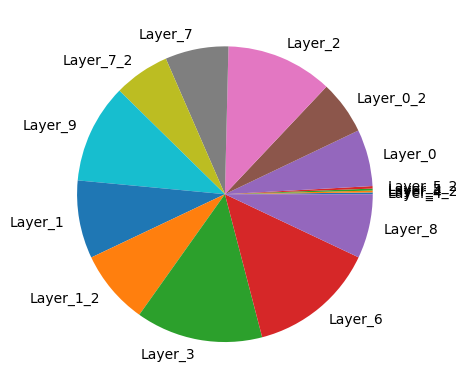

In [ ]:
import matplotlib.pyplot as plt

plt.pie(x = winding_loss_dict.values(),labels=winding_loss_dict.keys())

## 在ansys中添加绘图
这里以绘制bottom_plate中的B场幅值为例

In [ ]:
# # 在volume上添加B场幅值
Ansys.create_field_plot_volume(m3d, "bottom_plate", 'Mag_J', 'MagB in bottom plate')

更高阶的功能可以直接通过操作pyaedt的API来实现如下所示

In [ ]:
# quantity_name2 = "Mag_B"
# setup_name = "Setup1"
# intrinsic = {"Freq": "1MHz", "Phase": "0deg"}
# vollist = ["Top_plate_bottom"]

# # 在某一个面上绘制B场幅值
# plot2 = m3d.post.create_fieldplot_surface(m3d.modeler["Top_plate"].faces[1].id, 'Mag_B', m3d.existing_analysis_sweeps[0], intrinsic)
# # 导出图片
# m3d.post.export_field_jpg(
#     'E:\\Desktop\\Power_toys\\Power_toys\\prova2.jpg',
#     plot2.name,
#     plot2.plotFolder,
#     orientation='top',
#     display_wireframe=False,
# )
# # 导出数据到文件
# m3d.post.export_field_file_on_grid(
#     quantity_name="Mag_B",
#     solution="Setup1 : LastAdaptive",
#     filename='E:\\Desktop\\Power_toys\\Power_toys\\Mag.csv',
#     grid_start=[6,6,-0.2],
#     grid_stop=[6, 7, -0.2],
#     grid_step=[0.1, 0.1, 0],
#     intrinsics="1MHz",
# )

In [ ]:
layer_thick = []

In [ ]:
loss1 = {'Layer_4': 0.008160981325144135, 
'Layer_4_2': 0.00841587255241354, 
'Layer_5': 0.00893621835236717, 
'Layer_5_2': 0.011465427557568271, 
'Layer_0': 0.26086748791599207, 
'Layer_0_2': 0.2465395865656811, 
'Layer_2': 0.49013786668752085, 
'Layer_7': 0.2909012468006785, 
'Layer_7_2': 0.256640809321962, 
'Layer_9': 0.4564837506474886, 
'Layer_1': 0.35846329486246453, 
'Layer_1_2': 0.3416378031432378, 
'Layer_3': 0.5836236387395825, 
'Layer_6': 0.584839502470127, 
'Layer_8': 0.2951725992504724}

loss2 = {'Layer_5': 0.021325519083121983, 
         'Layer_5_2': 0.029311515030936916, 
         'Layer_6': 0.019134297952903195, 
         'Layer_6_2': 0.02997832220746138, 
         'Layer_1': 0.23591286317279858, 
         'Layer_1_2': 0.24644209232560482, 
         'Layer_3': 0.46840328395795633, 
         'Layer_8': 0.24384831882780136, 
         'Layer_8_2': 0.2590485051849109, 
         'Layer_10': 0.4456632668195654, 
         'Layer_0': 0.12454367379238514, 
         'Layer_2': 0.4416878983437709, 
         'Layer_4': 0.5690699914229048, 
         'Layer_7': 0.5561538271749439, 
         'Layer_9': 0.22851038721928338
         }
loss3 = {'Layer_4_1': 0.007869498363187635, 
         'Layer_4_2': 0.009136364030647841, 
         'Layer_5_1': 0.005090507014350036, 
         'Layer_5_2': 0.007690750162878706, 
         'Layer_0_1': 0.2622057105136101, 
         'Layer_0_2': 0.24586872888459188, 
         'Layer_2_1': 0.49359422772656986, 
         'Layer_7_1': 0.27701860790827837, 
         'Layer_7_2': 0.25648730382909524, 
         'Layer_9_1': 0.45189895360898963, 
         'Layer_1_1': 0.3717750760171587, 
         'Layer_1_2': 0.3325236463262538, 
         'Layer_3_1': 0.5953963162750471, 
         'Layer_6_1': 0.2968902016027462, 
         'Layer_6_2': 0.3081609669523285, 
         'Layer_8_1': 0.24620103178855923}
print(sum(loss1.values()))
print(sum(loss2.values()))
print(sum(loss3.values()))

4.2022860861927
3.919033762516349
4.167807891004293
